In [40]:
import pprint
import regex as re

In [4]:
url = 'https://www.dubaitourism.gov.ae/en/faqs'

In [38]:
import requests
from bs4 import BeautifulSoup

# Make a request to the website
url = "https://www.dubaitourism.gov.ae/en/faqs"
response = requests.get(url)


In [81]:
# Use Beautiful Soup to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')
s = soup.find('main',{"class": "main"})

<main class="main"><div class="c1put96c lps6bsb undefined h1vrv94s"><div class="container"><div class="header header-generic--secondary"><div class="module-group no-padding-bottom"><div class="row"><div class="col-xl-1"></div><div class="col-xl-11"><div class="header__category"><span class="c-category__text">FAQs</span></div><div class="header__title"><h1 class="h2 c-title__text">Frequently Asked Questions </h1></div></div></div></div><div class="module-group no-padding-top"><div class="row"><div class="col"><div class="row"><div class="col-xl-1"></div><div class="col-xl-11"><p class="p header__content">Looking for more information or have questions about a service? Browse our FAQs or check out some of our popular links.</p></div></div></div></div></div></div></div></div><div class="container c1g6k3ry lt55cmv" tabindex="0"><div class="module-group"><div class="module"><div class="row"><div class="col"><script type="application/ld+json">
          {
            "@context": "https://sche
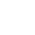

In [82]:
pprint.pprint((s))

In [7]:
# "Answer",\n                    "text": "You don&rsquo;t need an e-ticketing permit to list your event on Dubai Calendar. However, you do need an event permit."\n

In [99]:
pattern_q = '"name": "(.*)'
Q = re.findall(pattern_q,str(s))

In [100]:
Q

['Is the UAE and Dubai open for all tourists?",',
 'Are there any movement restrictions for unvaccinated travellers in Dubai?",',
 'Is it safe to travel to Dubai? What measures do you have in place?",',
 'What are the international travel requirements when travelling to Dubai?",',
 'Do I need travel insurance when coming to Dubai?",',
 'What are the procedures from my departure destination ahead of travelling to Dubai?",',
 'Following arrival, what are the procedures for exiting Dubai Airports?",',
 'Do I need a COVID-19 test when travelling to Dubai?",',
 'Will children and newborns be subject to COVID-19 PCR tests as well?",',
 'Is there going to be a mandatory quarantine for tourists?",',
 'If I show symptoms on arrival at Dubai Airport and test positive, what happens?",',
 'Are transit travellers required to follow the same procedures related to conducting Covid-19 PCR tests?",',
 'What are the procedures when departing from Dubai?",',
 'What do I need to know or what are the rules

In [101]:
# str(soup)

In [102]:
pattern_a = '"text": "(.*)'
A = []

for a in re.findall(pattern_a, str(s)):
    s = BeautifulSoup(a, "html.parser")
    A.append(s.get_text())

c:\Users\aadis\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [104]:
import pandas as pd
data = pd.DataFrame({"Questions":Q,"Answers":A})
data.to_csv("faqs.csv")

In [19]:
A[len(Q)]

'If you continue guiding after your license has expired, you will face a fine. The fine is AED200 for the first two years after expiration, then it increases to AED400 for up to 4 years.\\nFailure to pay the fine within the four years will result in the cancellation of your license.\\nTo avoid a fine, you must cancel your license."'

In [36]:
# sorted([a for a in A], key=lambda a: len(a))

In [69]:
len(A)

258

In [98]:
len(Q)

258

In [23]:
import os
os.makedirs('Scrapped Data\dubaitourism_FAQ', exist_ok=True)

In [53]:
import pickle
with open("Scrapped Data\dubaitourism_FAQ\Q.pickle", "wb") as f:
    pickle.dump(Q, f)
with open("Scrapped Data\dubaitourism_FAQ\A.pickle", "wb") as f:
    pickle.dump(A, f)

In [54]:
with open('Scrapped Data\dubaitourism_FAQ\Q.pickle', 'rb') as f:
    Q = pickle.load(f)
with open('Scrapped Data\dubaitourism_FAQ\A.pickle', 'rb') as f:
    A = pickle.load(f)

In [45]:
import spacy
nlp = spacy.blank('en')
x = [w.like_url for w in nlp(a)]
x


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [46]:
[a for a in A if max([w.like_url for w in nlp(a)])==True]

['The global mega event launched on 1 October and will run through to 31 March 2022. For the latest updates please visit https://www.expo2020dubai.com/ or @Expo2020dubai on social media."',
 'Yes, please visit www.DubaiAssured.ae for more details."',
 'Please visit www.dubaiexpert.ae\\n\\n\xa0\\n"',
 '\\n\\n\\nYou can apply for the scheme effective immediately. For details, please visit\xa0www.visitdubai.com/en/leisure-events-sponsorship.\\n\\n\\n"',
 'The free UAE National Tour Guide training programme is a nine-day course, please visit www.tourguidetraining.ae to register."']

In [47]:
([a for a in A if 'website' in a][2].replace('\\n','').strip())

'Follow the steps below:         Step 1: If you have not already done so, apply for your event permit and ticketing links             Step 2: You should ensure you are registered as a DET Supplier             Step 3: Agree event benefits with your Leisure Events team Account Manager             Step 4: Add Dubai Calendar as a ticketing channel on all event collateral, website, advertising\xa0material etc.            Step 5: Finalise your contract with DET, including a copy of your trade licence             Step 6: Market and hold your event ensuring agreed benefits are realised            Step 7: Work with your contracted ticketing company to reconcile ticketing report and payments\xa0with DET            Step 8: Upon receipt of LPO for sponsorship amount from DET, issue an invoice as instructed\xa0for sponsorship payment    "'

In [48]:
Q[1]

'Are there any movement restrictions for unvaccinated travellers in Dubai?'

In [49]:
A[1]

'\\n    \\n    \\n        Unvaccinated travellers to Dubai need to present a negative PCR test result done within the last 48 hours or a certificate of recovery from COVID-19, obtained within one month before the date of travel. \\n        Printed or digital PCR test or vaccination certificates are accepted in English or Arabic and must include a QR code. SMS certificates are not accepted. Certificates in other languages are acceptable if they can be validated at the departure point.\\n        \\n            Unvaccinated visitors most likely have to present the same results or certificates when attending free movement events, such as standing concerts, depending on the venue they go to.\\n            \\n                \\n            \\n            \\n        \\n        \\n    "'

In [50]:
print(str(A[1]).replace('\\n ','%%').replace('%%','\n'))


   
   
       Unvaccinated travellers to Dubai need to present a negative PCR test result done within the last 48 hours or a certificate of recovery from COVID-19, obtained within one month before the date of travel. 
       Printed or digital PCR test or vaccination certificates are accepted in English or Arabic and must include a QR code. SMS certificates are not accepted. Certificates in other languages are acceptable if they can be validated at the departure point.
       
           Unvaccinated visitors most likely have to present the same results or certificates when attending free movement events, such as standing concerts, depending on the venue they go to.
           
               
           
           
       
       
   "


In [51]:
string = re.sub(r'\s+', ' ', A[1])
string.strip()

'\\n \\n \\n Unvaccinated travellers to Dubai need to present a negative PCR test result done within the last 48 hours or a certificate of recovery from COVID-19, obtained within one month before the date of travel. \\n Printed or digital PCR test or vaccination certificates are accepted in English or Arabic and must include a QR code. SMS certificates are not accepted. Certificates in other languages are acceptable if they can be validated at the departure point.\\n \\n Unvaccinated visitors most likely have to present the same results or certificates when attending free movement events, such as standing concerts, depending on the venue they go to.\\n \\n \\n \\n \\n \\n \\n "'

In [52]:
re.sub(r'\s+', ' ', A[1])

'\\n \\n \\n Unvaccinated travellers to Dubai need to present a negative PCR test result done within the last 48 hours or a certificate of recovery from COVID-19, obtained within one month before the date of travel. \\n Printed or digital PCR test or vaccination certificates are accepted in English or Arabic and must include a QR code. SMS certificates are not accepted. Certificates in other languages are acceptable if they can be validated at the departure point.\\n \\n Unvaccinated visitors most likely have to present the same results or certificates when attending free movement events, such as standing concerts, depending on the venue they go to.\\n \\n \\n \\n \\n \\n \\n "'